In [1]:
import numpy as np
import src

In [2]:
# from jupyterthemes import jtplot
# jtplot.style(theme='onedork', context='notebook')

# Перша задача, неадаптивні алгоритми

In [3]:
sizes = (1_000, 2_000, 5_000, 10_000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов',
         'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [4]:
for size in sizes:
    a = src.generate_matrix(size)

    _, iters['Корпелевич'][size], times['Корпелевич'][size] = \
        src.korpelevich(
            x_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Tseng'][size], times['Tseng'][size] = \
        src.tseng(
            x_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. Tseng'][size], times['Кеш. Tseng'][size] = \
        src.cached_tseng(
            x_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Попов'][size], times['Попов'][size] = \
        src.popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. Попов'][size], times['Кеш. Попов'][size] = \
        src.cached_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Маліцький Tam'][size], times['Маліцький Tam'][size] = \
        src.malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. Маліцький Tam'][size], times['Кеш. Маліцький Tam'][size] = \
        src.cached_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

In [5]:
src.save_values_to_table(times, sizes, fn='1/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/iter', tp='iter')

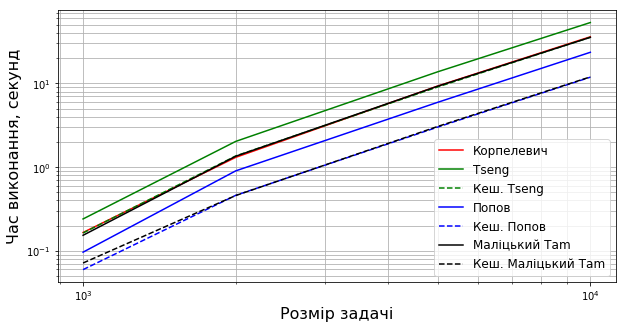

In [6]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/time',
                         styles=('r-', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Перша задача, адаптивні алгоритми

In [7]:
sizes = (1_000, 2_000, 5_000, 10_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [8]:
for size in sizes:
    a = src.generate_matrix(size)

    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
        src.adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
        src.cached_adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
        src.adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
        src.cached_adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
        src.adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
        src.cached_adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
        src.adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
        src.cached_adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)


In [9]:
src.save_values_to_table(times, sizes, fn='1/adapt/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/adapt/iter', tp='iter')

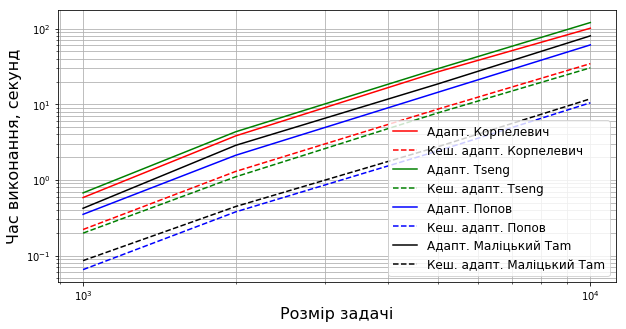

In [10]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Перша задача із розрідженими матрицями, неадаптивні алгоритми

In [11]:
sizes = (50_000, 100_000, 200_000, 500_000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов',
         'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [12]:
for size in sizes:
    a = src.generate_sparse_matrix(size)

    _, iters['Корпелевич'][size], times['Корпелевич'][size] = \
        src.korpelevich(
            x_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Tseng'][size], times['Tseng'][size] = \
        src.tseng(
            x_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. Tseng'][size], times['Кеш. Tseng'][size] = \
        src.cached_tseng(
            x_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Попов'][size], times['Попов'][size] = \
        src.popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. Попов'][size], times['Кеш. Попов'][size] = \
        src.cached_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Маліцький Tam'][size], times['Маліцький Tam'][size] = \
        src.malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. Маліцький Tam'][size], times['Кеш. Маліцький Tam'][size] = \
        src.cached_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)


In [13]:
src.save_values_to_table(times, sizes, fn='1/sparse/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/sparse/iter', tp='iter')

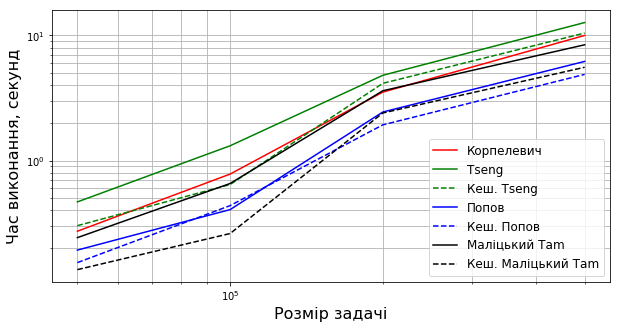

In [14]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/sparse/time',
                         styles=('r-', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Перша задача із розрідженими матрицями, адаптивні алгоритми

In [15]:
sizes = (50_000, 100_000, 200_000, 500_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [16]:
for size in sizes:
    a = src.generate_sparse_matrix(size)

    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
        src.adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
        src.cached_adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
        src.adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
        src.cached_adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
        src.adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
        src.cached_adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
        src.adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
        src.cached_adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)


In [17]:
src.save_values_to_table(times, sizes, fn='1/sparse/adapt/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/sparse/adapt/iter', tp='iter')

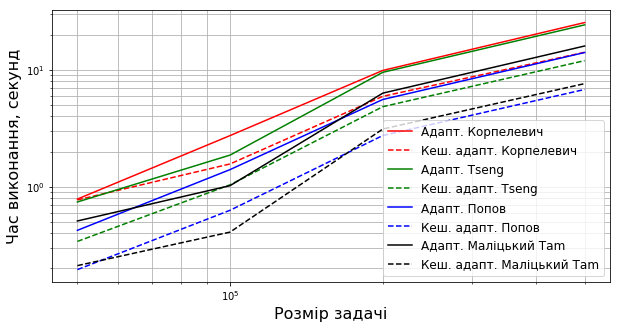

In [18]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/sparse/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Друга задача, неадаптивні алгоритми

In [19]:
def ProjectionOntoProbabilitySymplex(x: np.array) -> np.array:
    """ computes projection onto (scaled) a probability symplex """
    dimensionality = x.shape[0]
    x /= dimensionality
    sorted_x = np.flip(np.sort(x))
    prefix_sum = np.cumsum(sorted_x)
    to_compare = sorted_x + (1 - prefix_sum) / np.arange(1, dimensionality + 1)
    k = 0
    for j in range(1, dimensionality):
        if to_compare[j] > 0:
            k = j
    return dimensionality * np.maximum(np.zeros(dimensionality), x +
                                       (to_compare[k] - sorted_x[k]))

In [20]:
sizes = (100, 200, 500, 1000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов',
         'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [21]:
for size in sizes:
    for algo in algos:
        iters[algo][size] = []
        times[algo][size] = []

    for _ in range(5):
        np.random.seed(_)
        M, q = src.generate_random_matrix(size)

        _, iter_, time_ = src.korpelevich(
            x_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Корпелевич'][size].append(iter_)
        times['Корпелевич'][size].append(time_)

        _, iter_, time_ = src.tseng(
            x_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Tseng'][size].append(iter_)
        times['Tseng'][size].append(time_)

        _, iter_, time_ = src.cached_tseng(
            x_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Кеш. Tseng'][size].append(iter_)
        times['Кеш. Tseng'][size].append(time_)

        _, iter_, time_ = src.popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Попов'][size].append(iter_)
        times['Попов'][size].append(time_)

        _, iter_, time_ = src.cached_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Кеш. Попов'][size].append(iter_)
        times['Кеш. Попов'][size].append(time_)

        _, iter_, time_ = src.malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Маліцький Tam'][size].append(iter_)
        times['Маліцький Tam'][size].append(time_)

        _, iter_, time_ = src.cached_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Кеш. Маліцький Tam'][size].append(iter_)
        times['Кеш. Маліцький Tam'][size].append(time_)


In [22]:
for algo in algos:
    for size in sizes:
        iters[algo][size] = (int(np.mean(iters[algo][size])),
                             int(np.std(iters[algo][size])))
        times[algo][size] = (np.mean(times[algo][size]),
                             np.std(times[algo][size]))

In [23]:
src.save_intervals_to_table(times, sizes, fn='2/time', tp='time')
src.save_intervals_to_table(iters, sizes, fn='2/iter', tp='iter')

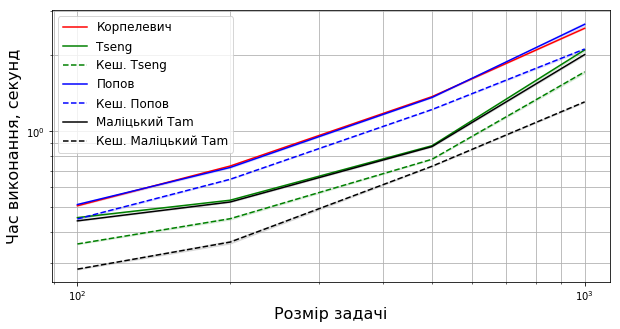

In [24]:
src.save_intervals_to_image(times,
                            sizes,
                            fn='2/time',
                            styles=('r-', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                            #styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                            title='Час виконання, секунд')

# Друга задача, адаптивні алгоритми

In [25]:
sizes = (100, 200, 500, 1000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [26]:
for size in sizes:
    for algo in algos:
        iters[algo][size] = []
        times[algo][size] = []

    for _ in range(5):
        np.random.seed(_)
        M, q = src.generate_random_matrix(size)

        _, iter_, time_ = src.adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Адапт. Корпелевич'][size].append(iter_)
        times['Адапт. Корпелевич'][size].append(time_)

        _, iter_, time_ = src.cached_adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Кеш. адапт. Корпелевич'][size].append(iter_)
        times['Кеш. адапт. Корпелевич'][size].append(time_)

        _, iter_, time_ = src.adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Адапт. Tseng'][size].append(iter_)
        times['Адапт. Tseng'][size].append(time_)

        _, iter_, time_ = src.cached_adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Кеш. адапт. Tseng'][size].append(iter_)
        times['Кеш. адапт. Tseng'][size].append(time_)

        _, iter_, time_ = src.adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Адапт. Попов'][size].append(iter_)
        times['Адапт. Попов'][size].append(time_)

        _, iter_, time_ = src.cached_adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Кеш. адапт. Попов'][size].append(iter_)
        times['Кеш. адапт. Попов'][size].append(time_)

        _, iter_, time_ = src.adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Адапт. Маліцький Tam'][size].append(iter_)
        times['Адапт. Маліцький Tam'][size].append(time_)

        _, iter_, time_ = src.cached_adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=lambda x: M.dot(x) + q,
            projector=ProjectionOntoProbabilitySymplex)
        iters['Кеш. адапт. Маліцький Tam'][size].append(iter_)
        times['Кеш. адапт. Маліцький Tam'][size].append(time_)


In [27]:
for algo in algos:
    for size in sizes:
        iters[algo][size] = (int(np.mean(iters[algo][size])),
                             int(np.std(iters[algo][size])))
        times[algo][size] = (np.mean(times[algo][size]),
                             np.std(times[algo][size]))

In [28]:
src.save_intervals_to_table(times, sizes, fn='2/adapt/time', tp='time')
src.save_intervals_to_table(iters, sizes, fn='2/adapt/iter', tp='iter')

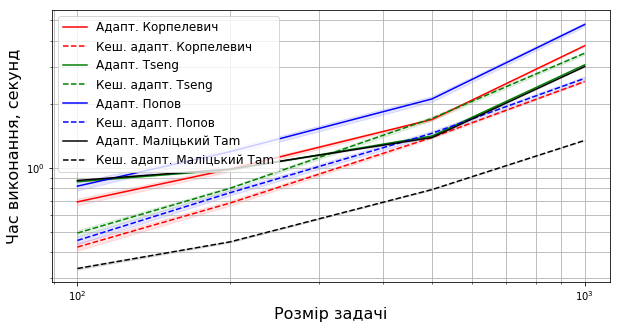

In [29]:
src.save_intervals_to_image(times,
                            sizes,
                            fn='2/adapt/time',
                            styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                            # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                            title='Час виконання, секунд')

# Третя задача

In [30]:
def f(x: np.array) -> np.array:
    """ function for third problem """
    return np.array([
        3 * x[0]**2 + 2 * x[0] * x[1] + 2 * x[1]**2 + x[2] + 3 * x[3] - 6,
        2 * x[0]**2 + x[0] + x[1]**2 + 10 * x[2] + 2 * x[3] - 2,
        3 * x[0]**2 + x[0] * x[1] + 2 * x[1]**2 + 2 * x[2] + 9 * x[3] - 9,
        x[0]**2 + 3 * x[2]**2 + 2 * x[2] + 3 * x[3] - 3
    ])

In [31]:
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [32]:
_, iters['Адапт. Корпелевич'], times['Адапт. Корпелевич'] = \
    src.adaptive_korpelevich(
        x_initial=np.ones(4),
        tau=.4,
        lambda_initial=1,
        operator=f,
        projector=ProjectionOntoProbabilitySymplex)

_, iters['Кеш. адапт. Корпелевич'], times['Кеш. адапт. Корпелевич'] = \
    src.cached_adaptive_korpelevich(
        x_initial=np.ones(4),
        tau=.4,
        lambda_initial=1,
        operator=f,
        projector=ProjectionOntoProbabilitySymplex)

_, iters['Адапт. Tseng'], times['Адапт. Tseng'] = \
    src.adaptive_tseng(
        x_initial=np.ones(4),
        tau=.4,
        lambda_initial=1,
        operator=f,
        projector=ProjectionOntoProbabilitySymplex)

_, iters['Кеш. адапт. Tseng'], times['Кеш. адапт. Tseng'] = \
    src.cached_adaptive_tseng(
        x_initial=np.ones(4),
        tau=.4,
        lambda_initial=1,
        operator=f,
        projector=ProjectionOntoProbabilitySymplex)

_, iters['Адапт. Попов'], times['Адапт. Попов'] = \
    src.adaptive_popov(
        x_initial=np.ones(4),
        y_initial=np.ones(4),
        tau=.4,
        lambda_initial=1,
        operator=f,
        projector=ProjectionOntoProbabilitySymplex)

_, iters['Кеш. адапт. Попов'], times['Кеш. адапт. Попов'] = \
    src.cached_adaptive_popov(
        x_initial=np.ones(4),
        y_initial=np.ones(4),
        tau=.4,
        lambda_initial=1,
        operator=f,
        projector=ProjectionOntoProbabilitySymplex)

_, iters['Адапт. Маліцький Tam'], times['Адапт. Маліцький Tam'] = \
    src.adaptive_malitskyi_tam(
        x0_initial=np.ones(4),
        x1_initial=np.ones(4),
        tau=.4,
        lambda0_initial=1,
        lambda1_initial=1,
        operator=f,
        projector=ProjectionOntoProbabilitySymplex)

_, iters['Кеш. адапт. Маліцький Tam'], times['Кеш. адапт. Маліцький Tam'] = \
    src.cached_adaptive_malitskyi_tam(
        x0_initial=np.ones(4),
        x1_initial=np.ones(4),
        tau=.4,
        lambda0_initial=1,
        lambda1_initial=1,
        operator=f,
        projector=ProjectionOntoProbabilitySymplex)


In [33]:
# src.save_values_to_table(times, sizes, fn='3/adapt/time', tp='time')
# src.save_values_to_table(iters, sizes, fn='3/adapt/iter', tp='iter')

In [34]:
# src.save_values_to_image(times,
#                          sizes,
#                          fn='3/adapt/time',
#                          styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
#                          # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
#                          title='Час виконання, секунд')

# Четверта задача, адаптивні алгоритми

In [35]:
sizes = (500, 1_000, 2_000, 5_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [36]:
def f(x: np.array) -> np.array:
    """ function for fourth problem """
    y = np.hstack([[0], x, [0]])
    f1 = y[1:-1]**2 + y[:-2]**2 + y[1:-1] * y[:-2] + y[1:-1] * y[2:]
    return f1 + d.dot(x) + c

In [37]:
for size in sizes:
    d, c = src.generate_tridiagonal_matrix(size)

    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
        src.adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
        src.cached_adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
        src.adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
        src.cached_adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
        src.adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
        src.cached_adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
        src.adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
        src.cached_adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))


In [38]:
src.save_values_to_table(times, sizes, fn='4/adapt/time', tp='time')
src.save_values_to_table(iters, sizes, fn='4/adapt/iter', tp='iter')

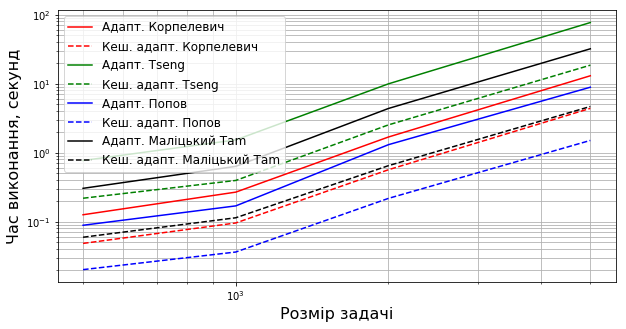

In [39]:
src.save_values_to_image(times,
                         sizes,
                         fn='4/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Четверта задача із розрідженими матрицями, адаптивні алгоритми

In [40]:
sizes = (20_000, 50_000, 100_000, 200_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [41]:
for size in sizes:
    d, c = src.generate_sparse_tridiagonal_matrix(size)

    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
        src.adaptive_korpelevich(
            x_initial=np.zeros(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
        src.cached_adaptive_korpelevich(
            x_initial=np.zeros(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
        src.adaptive_tseng(
            x_initial=np.zeros(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
        src.cached_adaptive_tseng(
            x_initial=np.zeros(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
        src.adaptive_popov(
            x_initial=np.zeros(size),
            y_initial=np.zeros(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
        src.cached_adaptive_popov(
            x_initial=np.zeros(size),
            y_initial=np.zeros(size),
            tau=.4,
            lambda_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
        src.adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
        src.cached_adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            operator=f,
            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))


In [42]:
src.save_values_to_table(times, sizes, fn='4/sparse/adapt/time', tp='time')
src.save_values_to_table(iters, sizes, fn='4/sparse/adapt/iter', tp='iter')

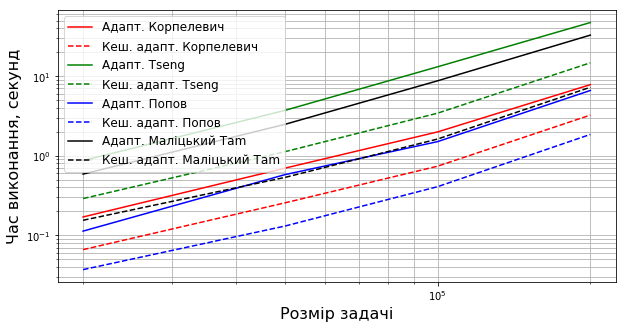

In [43]:
src.save_values_to_image(times,
                         sizes,
                         fn='4/sparse/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')